<a href="https://colab.research.google.com/github/ChicagoDataScientist/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [0]:
#making diagnosis numeric
df['diagnosis'] = df['diagnosis'].astype('category')

df['diagnosis'] = df['diagnosis'].cat.codes

df.head()

id  diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302          1  ...                  0.11890          NaN
1    842517          1  ...                  0.08902          NaN
2  84300903          1  ...                  0.08758          NaN
3  84348301          1  ...                  0.17300          NaN
4  84358402          1  ...                  0.07678          NaN

[5 rows x 33 columns]

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
df1 = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
df1.head()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]

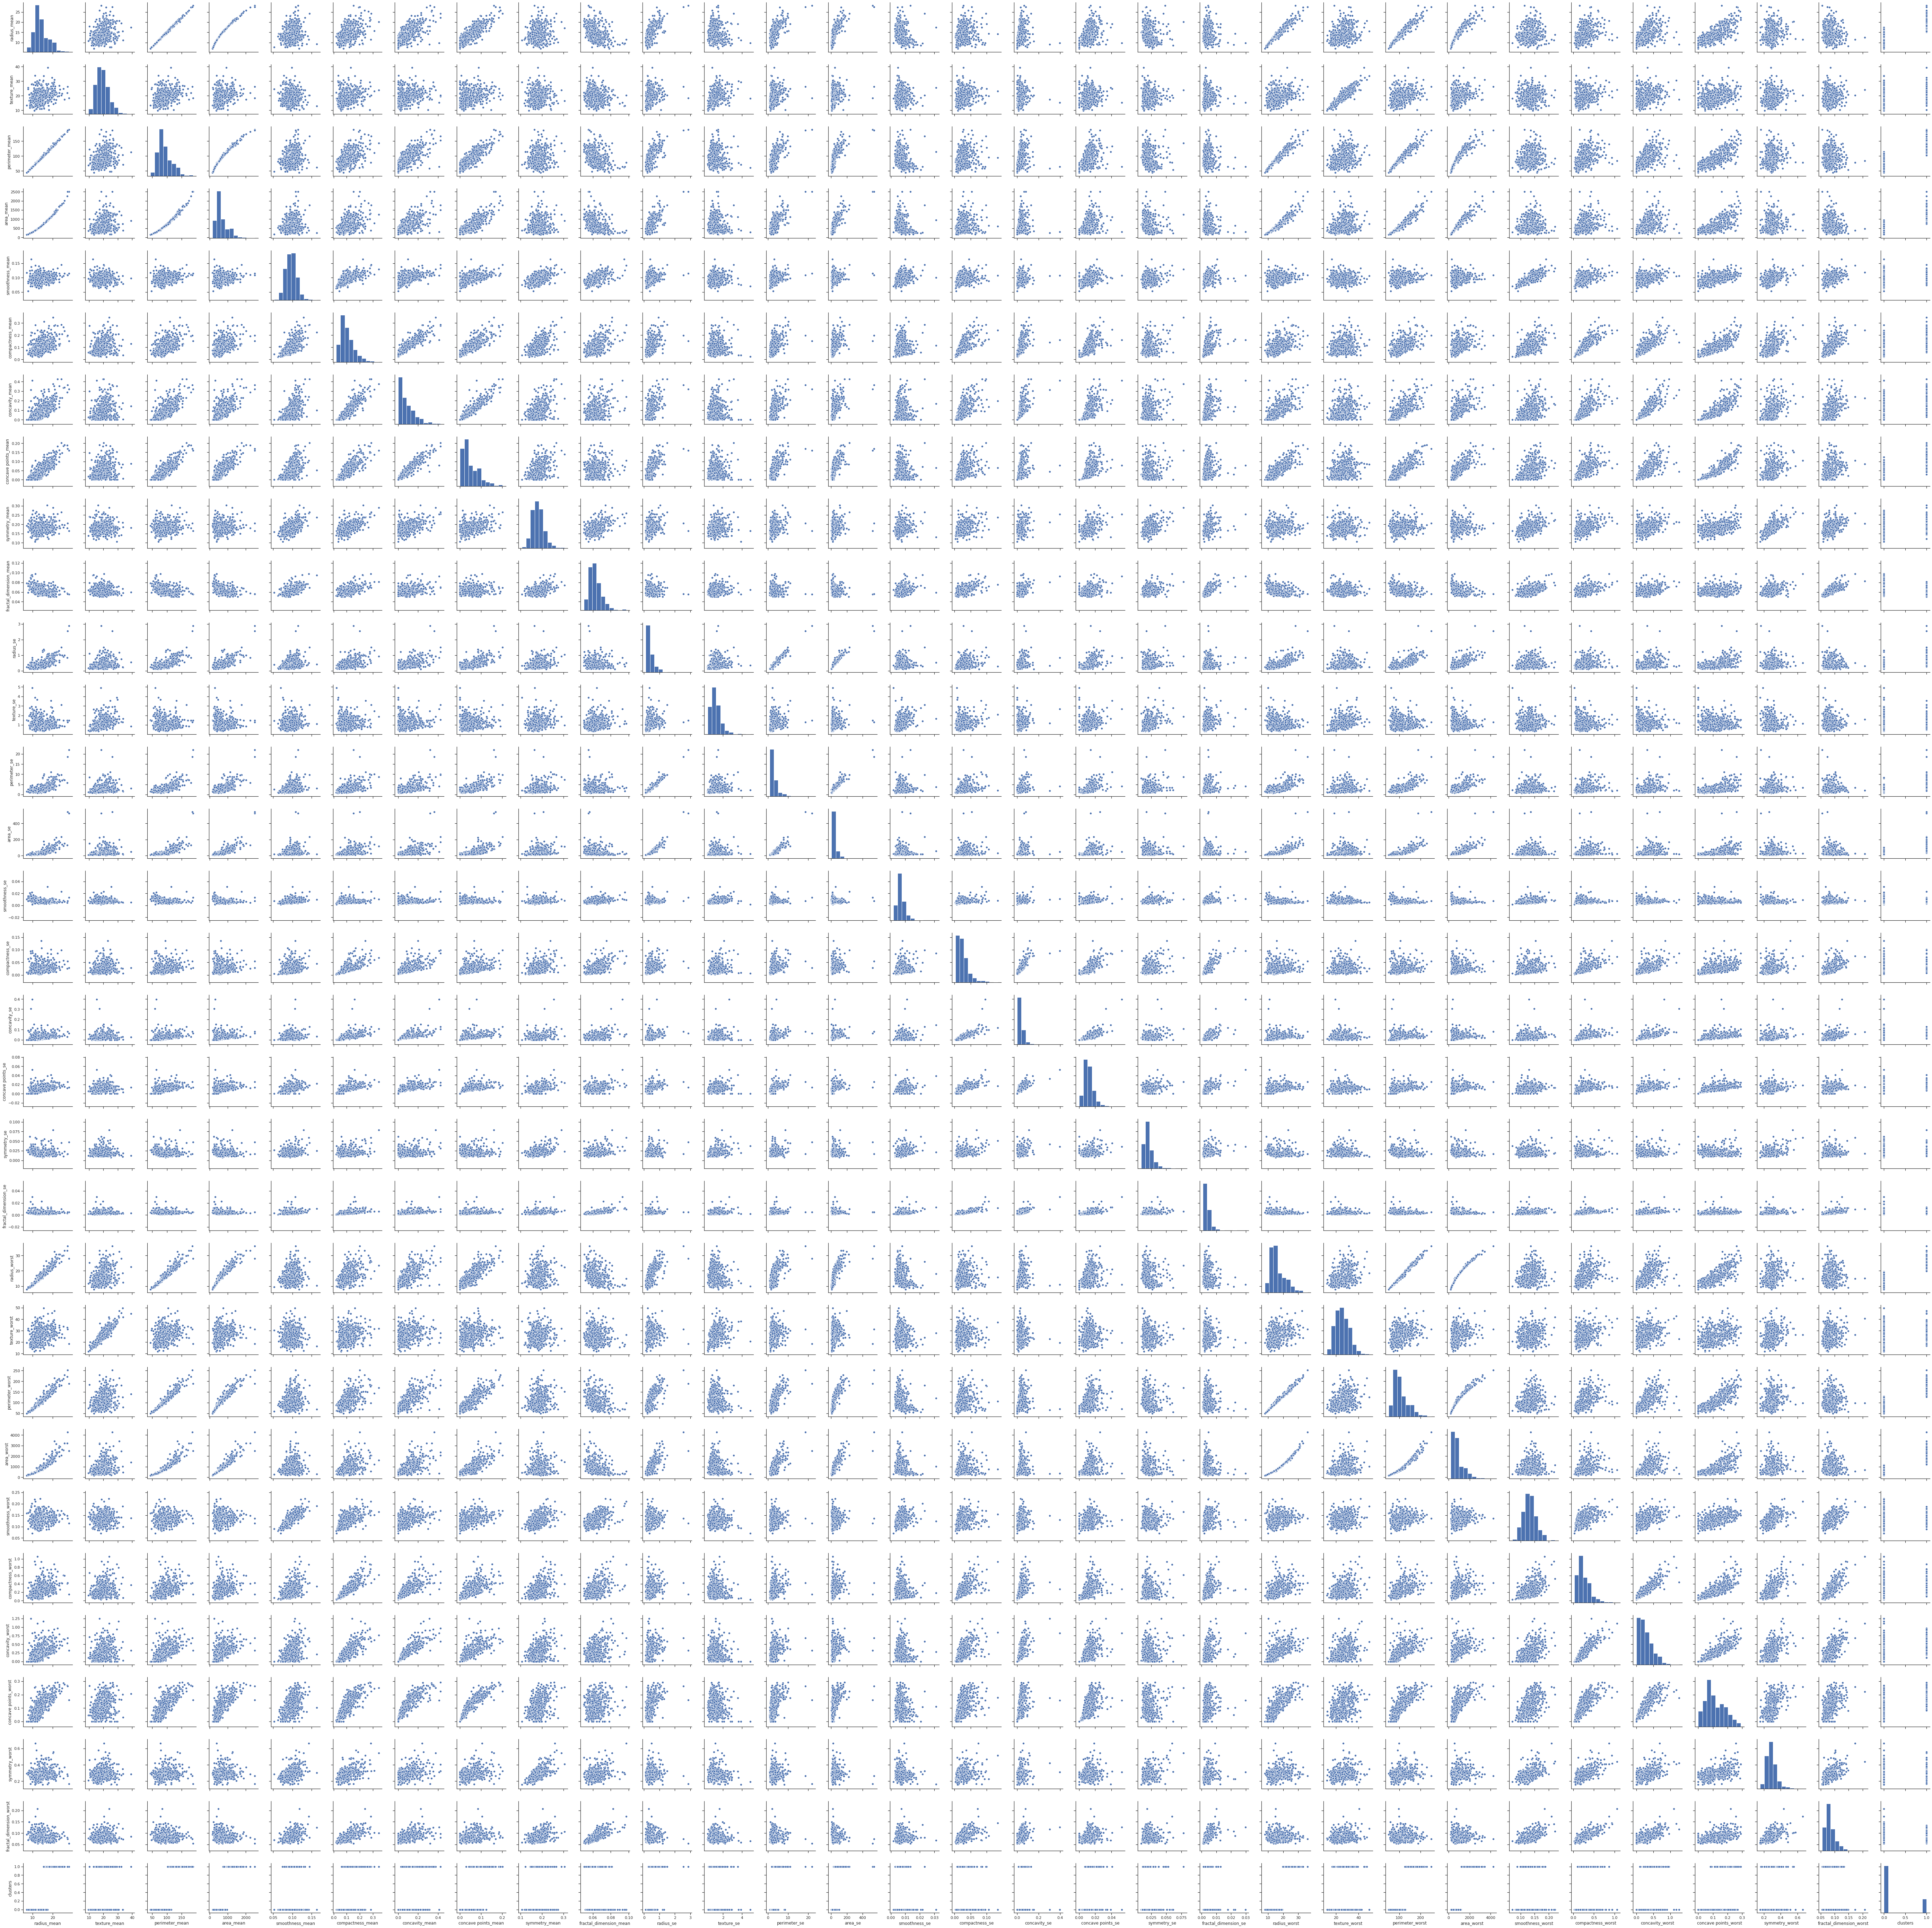

In [0]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df1)

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
# pick two features
features = ['radius_mean', 'texture_mean']

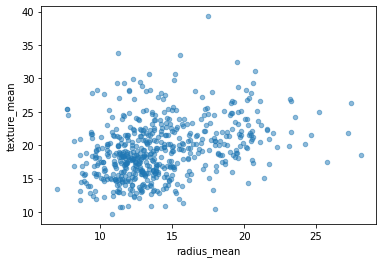

In [0]:
# plot selected features
df1[features].plot(kind='scatter', x=features[0], y=features[1], alpha=.5);

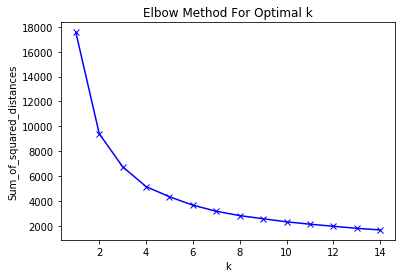

In [0]:
# create elbow graph to help decide how many clusters to use
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df1[features])
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
# Cluster using all of the columns
k = 2
kmeans = KMeans(n_clusters = k)
kmeans.fit(df1)
print(kmeans.labels_)

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

In [0]:
#adding clusters to df1
df1['clusters'] = pd.Series(kmeans.labels_)

df1.head()

radius_mean  texture_mean  ...  fractal_dimension_worst  clusters
0        17.99         10.38  ...                  0.11890         1
1        20.57         17.77  ...                  0.08902         1
2        19.69         21.25  ...                  0.08758         1
3        11.42         20.38  ...                  0.17300         0
4        20.29         14.34  ...                  0.07678         1

[5 rows x 31 columns]

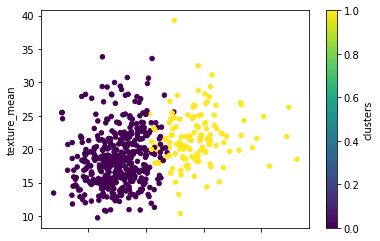

In [0]:
#scatter plot of clusters
df1.plot.scatter('radius_mean', 'texture_mean', c='clusters', colormap='viridis')
plt.show()

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:

# compare to get accuracy percentage
# 100%?
((df['diagnosis']==df1['clusters'])).value_counts()[1]/df.shape[0]

0.8541300527240774

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
# Standardize data

scaler = StandardScaler()
Z = scaler.fit_transform(df1)
Z

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.75062224,
         1.93701461,  1.82852713],
       [ 1.82982061, -0.35363241,  1.68595471, ..., -0.24388967,
         0.28118999,  1.82852713],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.152255  ,
         0.20139121,  1.82852713],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ..., -1.10454895,
        -0.31840916, -0.54688825],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  1.91908301,
         2.21963528,  1.82852713],
       [-1.80840125,  1.22179204, -1.81438851, ..., -0.04813821,
        -0.75120669, -0.54688825]])

In [0]:
# Perform PCA

pca = PCA(.9)
transformed_data = pca.fit_transform(Z)
transformed_data

array([[ 9.32458357,  2.15004105, -1.11210791, ..., -1.18236741,
         1.4121541 ,  2.15187214],
       [ 2.80075393, -3.87551183, -0.52804296, ...,  0.59769668,
         0.02552161, -0.04701787],
       [ 6.00963721, -1.0251781 , -0.54944642, ..., -0.1877008 ,
         0.54022252, -0.68665722],
       ...,
       [ 1.16121013, -1.70080373,  0.51650717, ...,  1.86701691,
        -0.53095555, -0.13565998],
       [10.48213445,  1.96271873, -1.88501759, ..., -0.04758458,
         0.56753413,  0.21789954],
       [-5.45445088, -0.89170135,  1.50284085, ..., -0.22039624,
         1.61599099,  1.67033343]])

In [0]:
# Get labels

kmeans = KMeans(2)
kmeans.fit(transformed_data)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 

In [0]:
# Add labels to df

df['clusters']= pd.Series(kmeans.labels_)
df.head()

id  diagnosis  radius_mean  ...  clusters       pc1        pc2
0    842302          1        17.99  ...         1  9.324584   2.150041
1    842517          1        20.57  ...         1  2.800754  -3.875512
2  84300903          1        19.69  ...         1  6.009637  -1.025178
3  84348301          1        11.42  ...         1  6.614346  10.626254
4  84358402          1        20.29  ...         1  4.274566  -2.001851

[5 rows x 36 columns]

In [0]:
# Add PC1 and PC2 to dataframe
df['pc1'] = transformed_data[:,0:1]
df['pc2'] = transformed_data[:,1:2]
df.head()

id  diagnosis  radius_mean  ...  clusters       pc1        pc2
0    842302          1        17.99  ...         1  9.324584   2.150041
1    842517          1        20.57  ...         1  2.800754  -3.875512
2  84300903          1        19.69  ...         1  6.009637  -1.025178
3  84348301          1        11.42  ...         1  6.614346  10.626254
4  84358402          1        20.29  ...         1  4.274566  -2.001851

[5 rows x 36 columns]

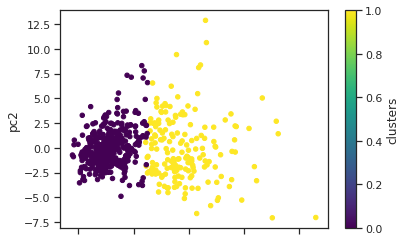

In [0]:
# Plot PC1 and PC2
df.plot.scatter(x='pc1', y='pc2', c='clusters', cmap='viridis' )

In [0]:
# Cluster using principal components containing >90% of the variance

scaler = StandardScaler()
Z = scaler.fit_transform(df1)

In [0]:
# # Perform PCA

# pca = PCA(30)
# transformed_data = pca.fit_transform(Z)

# transformed_data

In [0]:
# Define scree plot function

def scree_plot(pca):
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

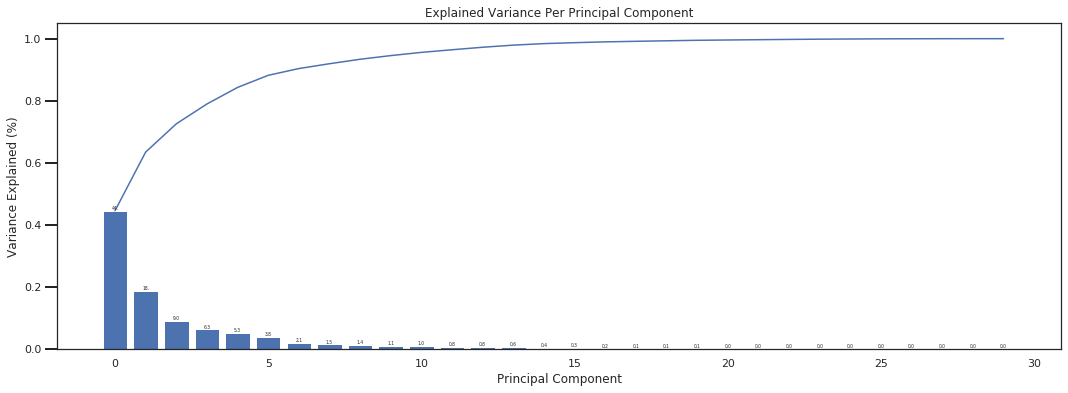

In [0]:
# Scree plot
scree_plot(pca)

In [0]:
pca.explained_variance_ratio_[0:7]

array([0.44597568, 0.1888383 , 0.09096441, 0.06391796, 0.05332564,
       0.0389475 , 0.02181292])

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

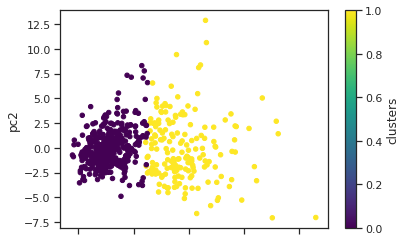

In [0]:
# Scatterplot of PC1 and PC2
df.plot.scatter(x='pc1', y='pc2', c='clusters', cmap='viridis');

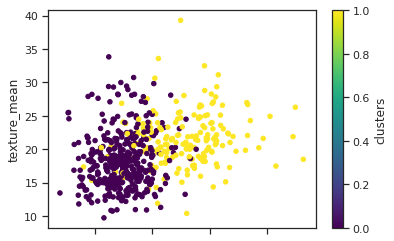

In [0]:
# Clustering scatterplot on raw data
df.plot.scatter('radius_mean', 'texture_mean', c='clusters', colormap='viridis')
plt.show()

In [0]:
# Accuracy for 90% of explained variance clustering is higher
# Calculate accuracy of PC1 and PC2
((df['diagnosis'] == df['clusters'])).value_counts()[1]/len(df)

0.9226713532513181

In [0]:

( ~(df['diagnosis'] == df['clusters'])).value_counts()[1]/len(df)

0.0773286467486819

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project